In [ ]:
from imdb import IMDb
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import cPickle as pickle
ia = IMDb(accessSystem='http')
from collections import defaultdict 
import io
from datetime import datetime
import time
from sklearn.linear_model import LogisticRegression, ElasticNet
import sklearn.svm
import math
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
# Load AAdictfinal (dict of Oscar nominated movies)
AAdictfinal = pickle.load(open('AAdictfinal.p','rb'))
# Convert AAdictfinal to AAdf, pandas
AAdf = pd.DataFrame.from_dict(AAdictfinal).transpose()

In [ ]:
# Make a copy of AAdf into dftouse so we can delete unneeded columns for the first part of the analysis
dftouse = AAdf.copy()
cols_to_delete = [ u'Won Best Actor',
 u'Won Best Actress',
 u'Won Best Animated Feature Film',
 u'Won Best Art Direction',
 u'Won Best Cinematography',
 u'Won Best Costume Design',
 u'Won Best Director',
 u'Won Best Documentary, Feature',
 u'Won Best Documentary, Short Subject',
 u'Won Best Film Editing',
 u'Won Best Foreign Language Film',
 u'Won Best Makeup',
 u'Won Best Music, Adaptation / Original Song Score',
 u'Won Best Music, Dramatic Score',
 u'Won Best Music, Musical or Comedy Score',
 u'Won Best Music, Original Score',
 u'Won Best Music, Song',
 u'Won Best Picture',
 u'Won Best Short Film, Animated',
 u'Won Best Short Film, Live Action',
 u'Won Best Sound',
 u'Won Best Sound Editing',
 u'Won Best Sound Effects Editing',
 u'Won Best Sound Mixing',
 u'Won Best Supporting Actor',
 u'Won Best Supporting Actress',
 u'Won Best Visual Effects',
 u'Won Best Writing, Adapted Screenplay',
 u'Won Best Writing, Original Screenplay',
 u'Won Special Achievement Award',
 u'mpaa',
 u'title',
 u'movieid',
 u'cast',
 u'director',
 u'genres',
 u'countrylist',
 u'keywords',
 u'releasedate',
 u'country',
 u'won',
 u'nominations']
for col in cols_to_delete:
    del dftouse[col]

In [ ]:
# Creat a list of indicator variables

NONINDICATORS = ['month','mpaaint','numnominations','quarter','runtime','year']
INDICATORS = set(list(dftouse.columns)) - set(NONINDICATORS)
INDICATORS.remove(u'winner')
#INDICATORS = [u'Action', u'Adventure',u'Nominated Best Actor']

In [ ]:
for indicatorcol in INDICATORS:
    # Check if not boolean
    if len(set(dftouse[indicatorcol])) > 2:
        dftouse[indicatorcol] = dftouse[indicatorcol].apply(lambda x: (type(x)==unicode or type(x)==str)*1)

In [ ]:
# Code Credit:  HW #3
dfgb=dftouse.groupby('winner')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), NONINDICATORS):
    for k, v in dfgb[p]:
        if k == 0:
            label = "Loser"
        else:
            label = "Winner" 
        sns.kdeplot(v, ax=ax, label = label, shade = True)
        ax.set_title(p)

In [ ]:
# Code Credit:  HW #3
fig, axes = plt.subplots(nrows=22, ncols=4, figsize=(30,150), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), INDICATORS):
    for k, v in dfgb[p]:
        if k == 0:
            label = "Loser"
        else:
            label = "Winner" 
        v.hist(ax=ax, alpha=0.4, label=label, range = [0,1])
        ax.set_title(p)
        ax.legend()

In [ ]:
# 1) Total number of movies nominated / won in a given year
# 2) Bar chart showing keywords by winner/losers
# 3) Bar chart showing genres
# 4) Mpaa by winner/loser
# 5) Standardize those variables

In [ ]:
%%time

# Get list of unique countries, genres, keywords
# Will be used to create barcharts
countries_dict = {}
genreslist = set()
keywords_dict = {}
for _,movie in AAdf.iterrows():
    if type(movie['countrylist']) == list:
        for country in movie['countrylist']:
            if country in countries_dict.keys():
                countries_dict[str(country)] += 1
            else:
                countries_dict[str(country)] = 1
    for genre in movie['genres']:
        genreslist.add(genre)
    if type(movie.keywords) == list:
        for keyword in movie.keywords:
            if keyword in keywords_dict.keys():
                keywords_dict[keyword] += 1
            else:
                keywords_dict[keyword] = 1
# shorten countries and keywords dictionary to only most common keywords to reduce dimensionality
numother = 0
for country in countries_dict.keys():
    if countries_dict[country] <= 10:
        numother = numother + countries_dict[country]
        del countries_dict[country]
countries_dict['OtherCountry'] = numother
for keyword in keywords_dict.keys():
    if keywords_dict[keyword] <= 200:
        del keywords_dict[keyword]
        
countrieslist = set(countries_dict.keys())
genreslist = set(genreslist)
keywordslis = set(keywords_dict.keys())

In [176]:
countries_dict_winner = {}
countries_dict_loser = {}
for country in countries_dict.keys():
    countries_dict_loser[country] = sum(dftouse[dftouse['winner']==0][country])
    countries_dict_winner[country] = sum(dftouse[dftouse['winner']==1][country])

In [ ]:
genreslist.plot(kind="bar", title="Genres" );
pl.xlabel('Genres')
pl.ylabel('Percentage')

In [ ]:
genreslist.plot(kind="bar", title="Keywords" );
pl.xlabel('Keywords')
pl.ylabel('Percentage')

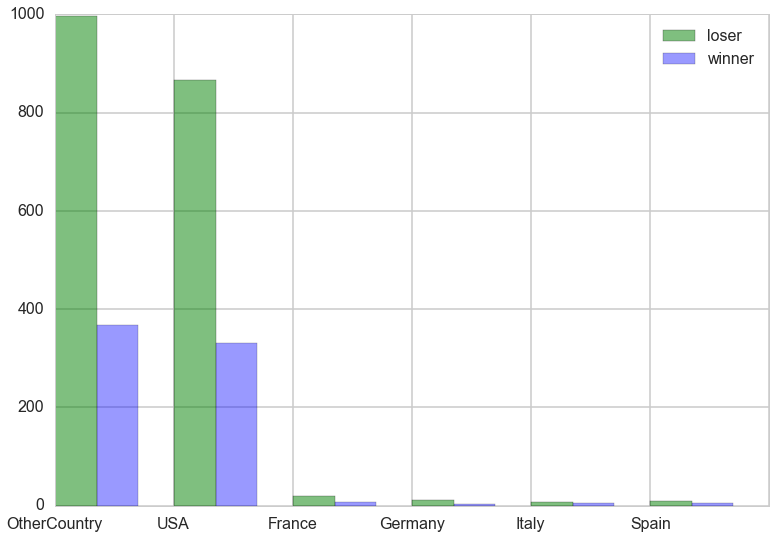

In [194]:
countryloc1 = [1,2,3,4,5,6]
countryloc2 = [1.35,2.35,3.35,4.35,5.35,6.35]
fig, ax = plt.subplots()
rects1 = ax.bar(countryloc1,countries_dict_loser.values(), 0.35, color='g', label='loser', alpha = .5)
rects1 = ax.bar(countryloc2,countries_dict_winner.values(), 0.35, color='b', label='winner', alpha = .4)
ax.set_xticklabels(countries_dict_loser.keys())
ax.legend()
plt.show()

In [162]:
genreslist

{u'Action',
 u'Adventure',
 u'Animation',
 u'Biography',
 u'Comedy',
 u'Crime',
 u'Documentary',
 u'Drama',
 u'Family',
 u'Fantasy',
 u'History',
 u'Horror',
 u'Music',
 u'Musical',
 u'Mystery',
 u'News',
 u'Romance',
 u'Sci-Fi',
 u'Short',
 u'Sport',
 u'Talk-Show',
 u'Thriller',
 u'War',
 u'Western'}